# Student Result Analysis Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,10-May,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,10-May,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,10-May,61,70,67
30639,934,male,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,10-May,82,90,93


In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### Drop Unnamed: 0 Column

In [5]:
df = df.drop("Unnamed: 0", axis= 1)
df.head(20)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,10-May,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,10-May,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# Data Visualization

### Gender Distribution

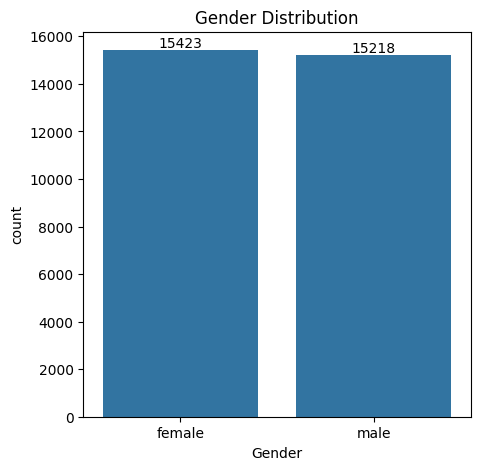

In [6]:
plt.figure(figsize=(5, 5))  
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

# ParentMaritalStatus

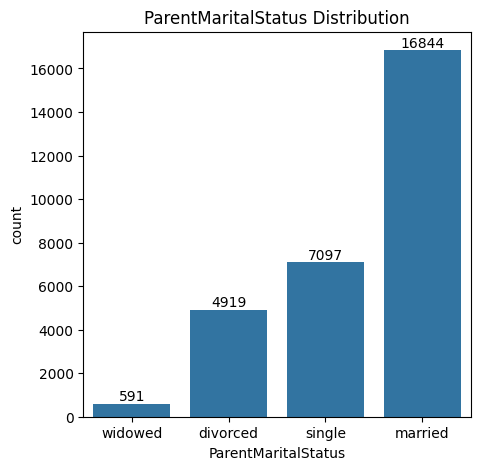

In [ ]:
plt.figure(figsize=(5, 5))  
order = df["ParentMaritalStatus"].value_counts().sort_values().index
ax = sns.countplot(data=df, x="ParentMaritalStatus", order=order, palette="inferno")
ax.bar_label(ax.containers[0])
plt.title("ParentMaritalStatus Distribution")
plt.show()

## Relationship between Parents Education and Student score

In [8]:
gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


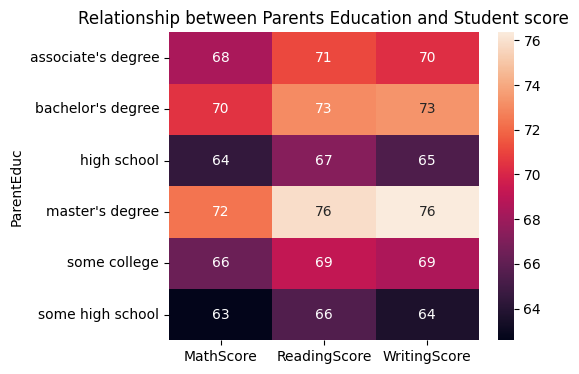

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parents Education and Student score")
plt.show()

In [10]:
# from the above chart we have concluded that:
#  The education of the parents have a good impact

## Relationship between Parents Education and Student score

In [11]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


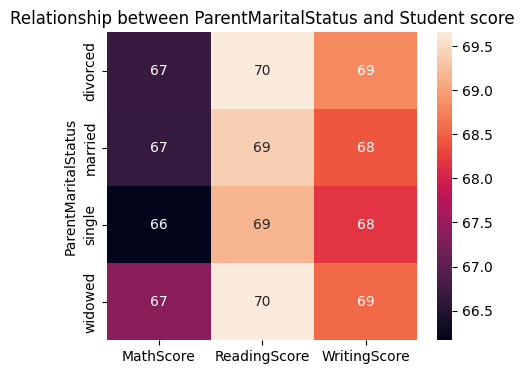

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(gb1, annot=True)
plt.title("Relationship between ParentMaritalStatus and Student score")
plt.show()

In [13]:
# from the above chart we have concluded that:
#  there is no/negligible impact on the student's score due to their parent's marital status

## Distribution of EthnicGroup

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


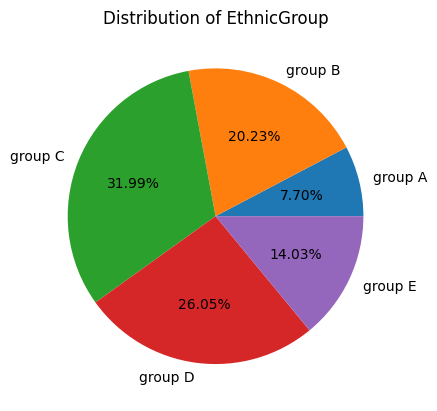

In [14]:
groupA = df.loc[df['EthnicGroup'] == "group A"].count()
groupB = df.loc[df['EthnicGroup'] == "group B"].count()
groupC = df.loc[df['EthnicGroup'] == "group C"].count()
groupD = df.loc[df['EthnicGroup'] == "group D"].count()
groupE = df.loc[df['EthnicGroup'] == "group E"].count()

l = ["group A", "group B", "group C", "group D", "group E"]
mylist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

print(mylist)

plt.pie(mylist, labels=l, autopct="%1.2f%%")
plt.title("Distribution of EthnicGroup")
plt.show()

C:\Users\SS Computer\AppData\Local\Temp\ipykernel_1628\2305823055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df, x= "EthnicGroup", order=order, palette="inferno")


[Text(0, 0, '2219')]

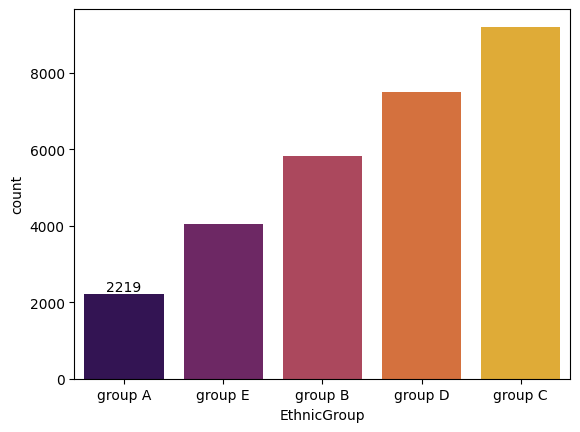

In [15]:
order = df["EthnicGroup"].value_counts().sort_values().index
ax = sns.countplot(data= df, x= "EthnicGroup", order=order, palette="inferno")
ax.bar_label(ax.containers[0])